
# Project: Analysis of "No-Show appointments" Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

**‘ScheduledDay’**: Tells us on what day the patient set up their appointment.

**‘Neighborhood’**: Indicates the location of the hospital.

**‘Scholarship’** : Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

 **‘No-Show’**      :‘No’ Indicates that patient showed up to their appointment and ‘Yes’ indicates that they did not show up.
 
 **‘SMS_Recieved’** : Indicates whether patient recieved SMS from the hospital or not.
 
 ##### Following are the questions that I  plan to explore over the course of this report:
  
Question 1: Do Patients enrolled with Brazilian Welfare Program(having Scholarship) show up more or less?

Question 2: Which Neighbourhood receives maximum and minimum No-Show/Show-up

Question 3: How is age of  patients related to Show-up/No-Show on the appointment day?

Question 4: Analysis of No-Show status based on gender

Question 5: The patients who recieved SMS showed up more or less?

Question 6: How is No_Show status related to patient's disease(Diabetes,Hypertension,Alcoholism,Handicap)?

 

In [77]:
## import all necessary packages and functions.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


In [78]:
# Load data and print a few lines. 
df_noshow=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [79]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [80]:
#Display shape of the dataset(No. of columns and rows)
df_noshow.shape

(110527, 14)

In [81]:
#Display unique values 
df_noshow.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [82]:
#Displays null values if any
df_noshow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [83]:
#Displays number of dupliates
sum(df_noshow.duplicated())

0

In [84]:
#Displays unique values of Age
df_noshow['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

<a id='wrangling'></a>
## Data Wrangling


### General Properties

### Rename Column Labels

Renaming column labels having incorrect spellings and Punctuations.

In [85]:
#Renaming Column Labels
df_noshow=df_noshow.rename(columns={'PatientId':'PatientID','Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMS_Received','No-show':'No_Show'})

#Check on renaming
df_noshow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### DataType Coversion
Converting to appropriate datatypes for the following columns:

PatientID: Float to Int

ScheduledDay,AppointmentDay: Int to Datetime



In [86]:
#Convert dataype of "PatientId" column from float to int
df_noshow['PatientID']=pd.to_numeric(df_noshow['PatientID'],downcast='integer')

#Check on conversion
df_noshow['PatientID'].dtype


dtype('int64')

In [87]:
#Converting datatype Of ScheduledDay and AppointmentDay from int to datetime
df_noshow['ScheduledDay']=pd.to_datetime(df_noshow['ScheduledDay'])
df_noshow['AppointmentDay']=pd.to_datetime(df_noshow['AppointmentDay'])

#Check on conversion
df_noshow.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_Received      110527 non-null int64
No_Show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


### Deleting patient rows having age less than 0


In [88]:
#Droppping rows containing Age less than 0
df_noshow= df_noshow.drop(df_noshow[df_noshow.Age<0].index)

#Checking unique age values after drop
df_noshow['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

### Drop Duplicates
Check and drop duplicates considering 'PatientId' and 'ScheduledDay' columns

In [89]:
#Display number of duplicates considering 'PatientId'and'ScheduledDay' columns
sum(df_noshow.duplicated(subset=['PatientID','ScheduledDay']))

1334

In [90]:
#Dropping duplicates 
df_noshow.drop_duplicates(['PatientID','ScheduledDay'], keep='first',inplace=True)

#Checking shape of dataset after dropping duplicates
df_noshow.shape

(109192, 14)

### Replace values of "No-Show" column
Replacing status 'No' with 'Show-up and 'Yes' with 'No-Show'

In [91]:
## Replacing no-show status No=Show-up, Yes=No-Show
df_noshow['No_Show']=df_noshow['No_Show'].str.replace('No','Show-up')
df_noshow['No_Show']=df_noshow['No_Show'].str.replace('Yes','No-Show')

#Check on replacement
df_noshow['No_Show'].unique()

array(['Show-up', 'No-Show'], dtype=object)

In [92]:
df_noshow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
0,29872500000000,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Show-up
1,558998000000000,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Show-up
2,4262960000000,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Show-up
3,867951000000,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Show-up
4,8841190000000,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Show-up


In [93]:
df_noshow.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received
count,1.091920e+05,1.091920e+05,109192.000000,109192.000000,109192.000000,109192.000000,109192.000000,109192.000000,109192.000000
mean,1.475127e+14,5.675753e+06,37.097351,0.098231,0.197377,0.071864,0.030497,0.022199,0.322872
std,2.560826e+14,7.116156e+04,23.140676,0.297628,0.398021,0.258264,0.171950,0.161109,0.467576
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176525e+12,5.640751e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172600e+13,5.680910e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439468e+13,5.725951e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Do Patients enrolled with Brazilian Welfare Program(having Scholarship) show up more or less?

0    98466
1    10726
Name: Scholarship, dtype: int64


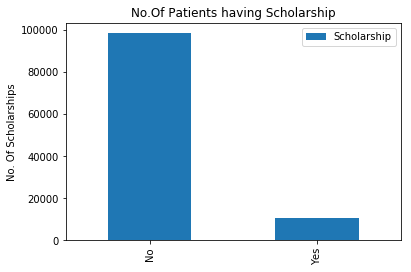

In [94]:
Scholarship=df_noshow.Scholarship.value_counts()
print(Scholarship)
Scholarship.plot(kind='bar')
a=[0,1]
labels=['No','Yes']
plt.xticks(a,labels,rotation='vertical')
plt.ylabel('No. Of Scholarships')
plt.title('No.Of Patients having Scholarship')
plt.legend()
plt.show()

        Scholarship
Gender             
F              8738
M              1988


Text(0,0.5,'Scholarship')

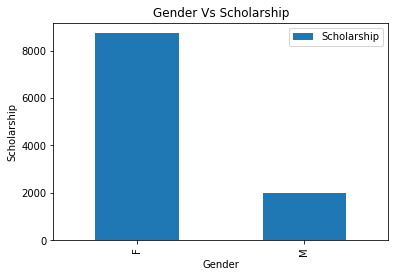

In [95]:
group= df_noshow[['Gender','Scholarship']]
gender_group = group.groupby(['Gender']).sum()
print(gender_group)
gender_group.plot(kind='bar',title="Gender Vs Scholarship")
plt.ylabel('Scholarship')

No_Show        No-Show    Show-up
Scholarship                      
0            19.631142  80.368858
1            23.596867  76.403133


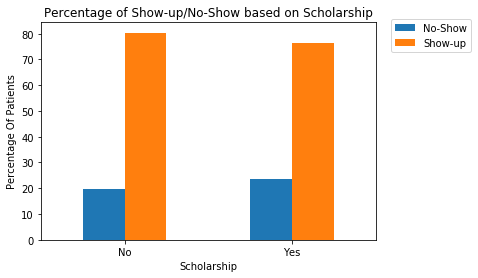

In [96]:
#Scholarship
Scholarship_NoShow=pd.crosstab(df_noshow.Scholarship,df_noshow.No_Show).apply(lambda r:r/r.sum()*100,axis=1)
print(Scholarship_NoShow)
Scholarship_NoShow.plot(kind='bar')
x=[0,1]
labels=['No','Yes']
plt.title('Percentage of Show-up/No-Show based on Scholarship')
plt.xticks(x, labels, rotation='vertical')
plt.xticks(rotation='horizontal')
plt.ylabel('Percentage Of Patients')
plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1.04))

**Number of patients having scholarship is less and majority of them are females.
Percentage of people having scholarship and don't show up is more.**

### Question 2: Which Neighbourhood receives maximum and minimum No-Show/Show-up?

Neighbourhood having maximum patients is JARDIM CAMBURI
Neighbourhood having minimum patients is PARQUE INDUSTRIAL


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text xticklabel objects>)

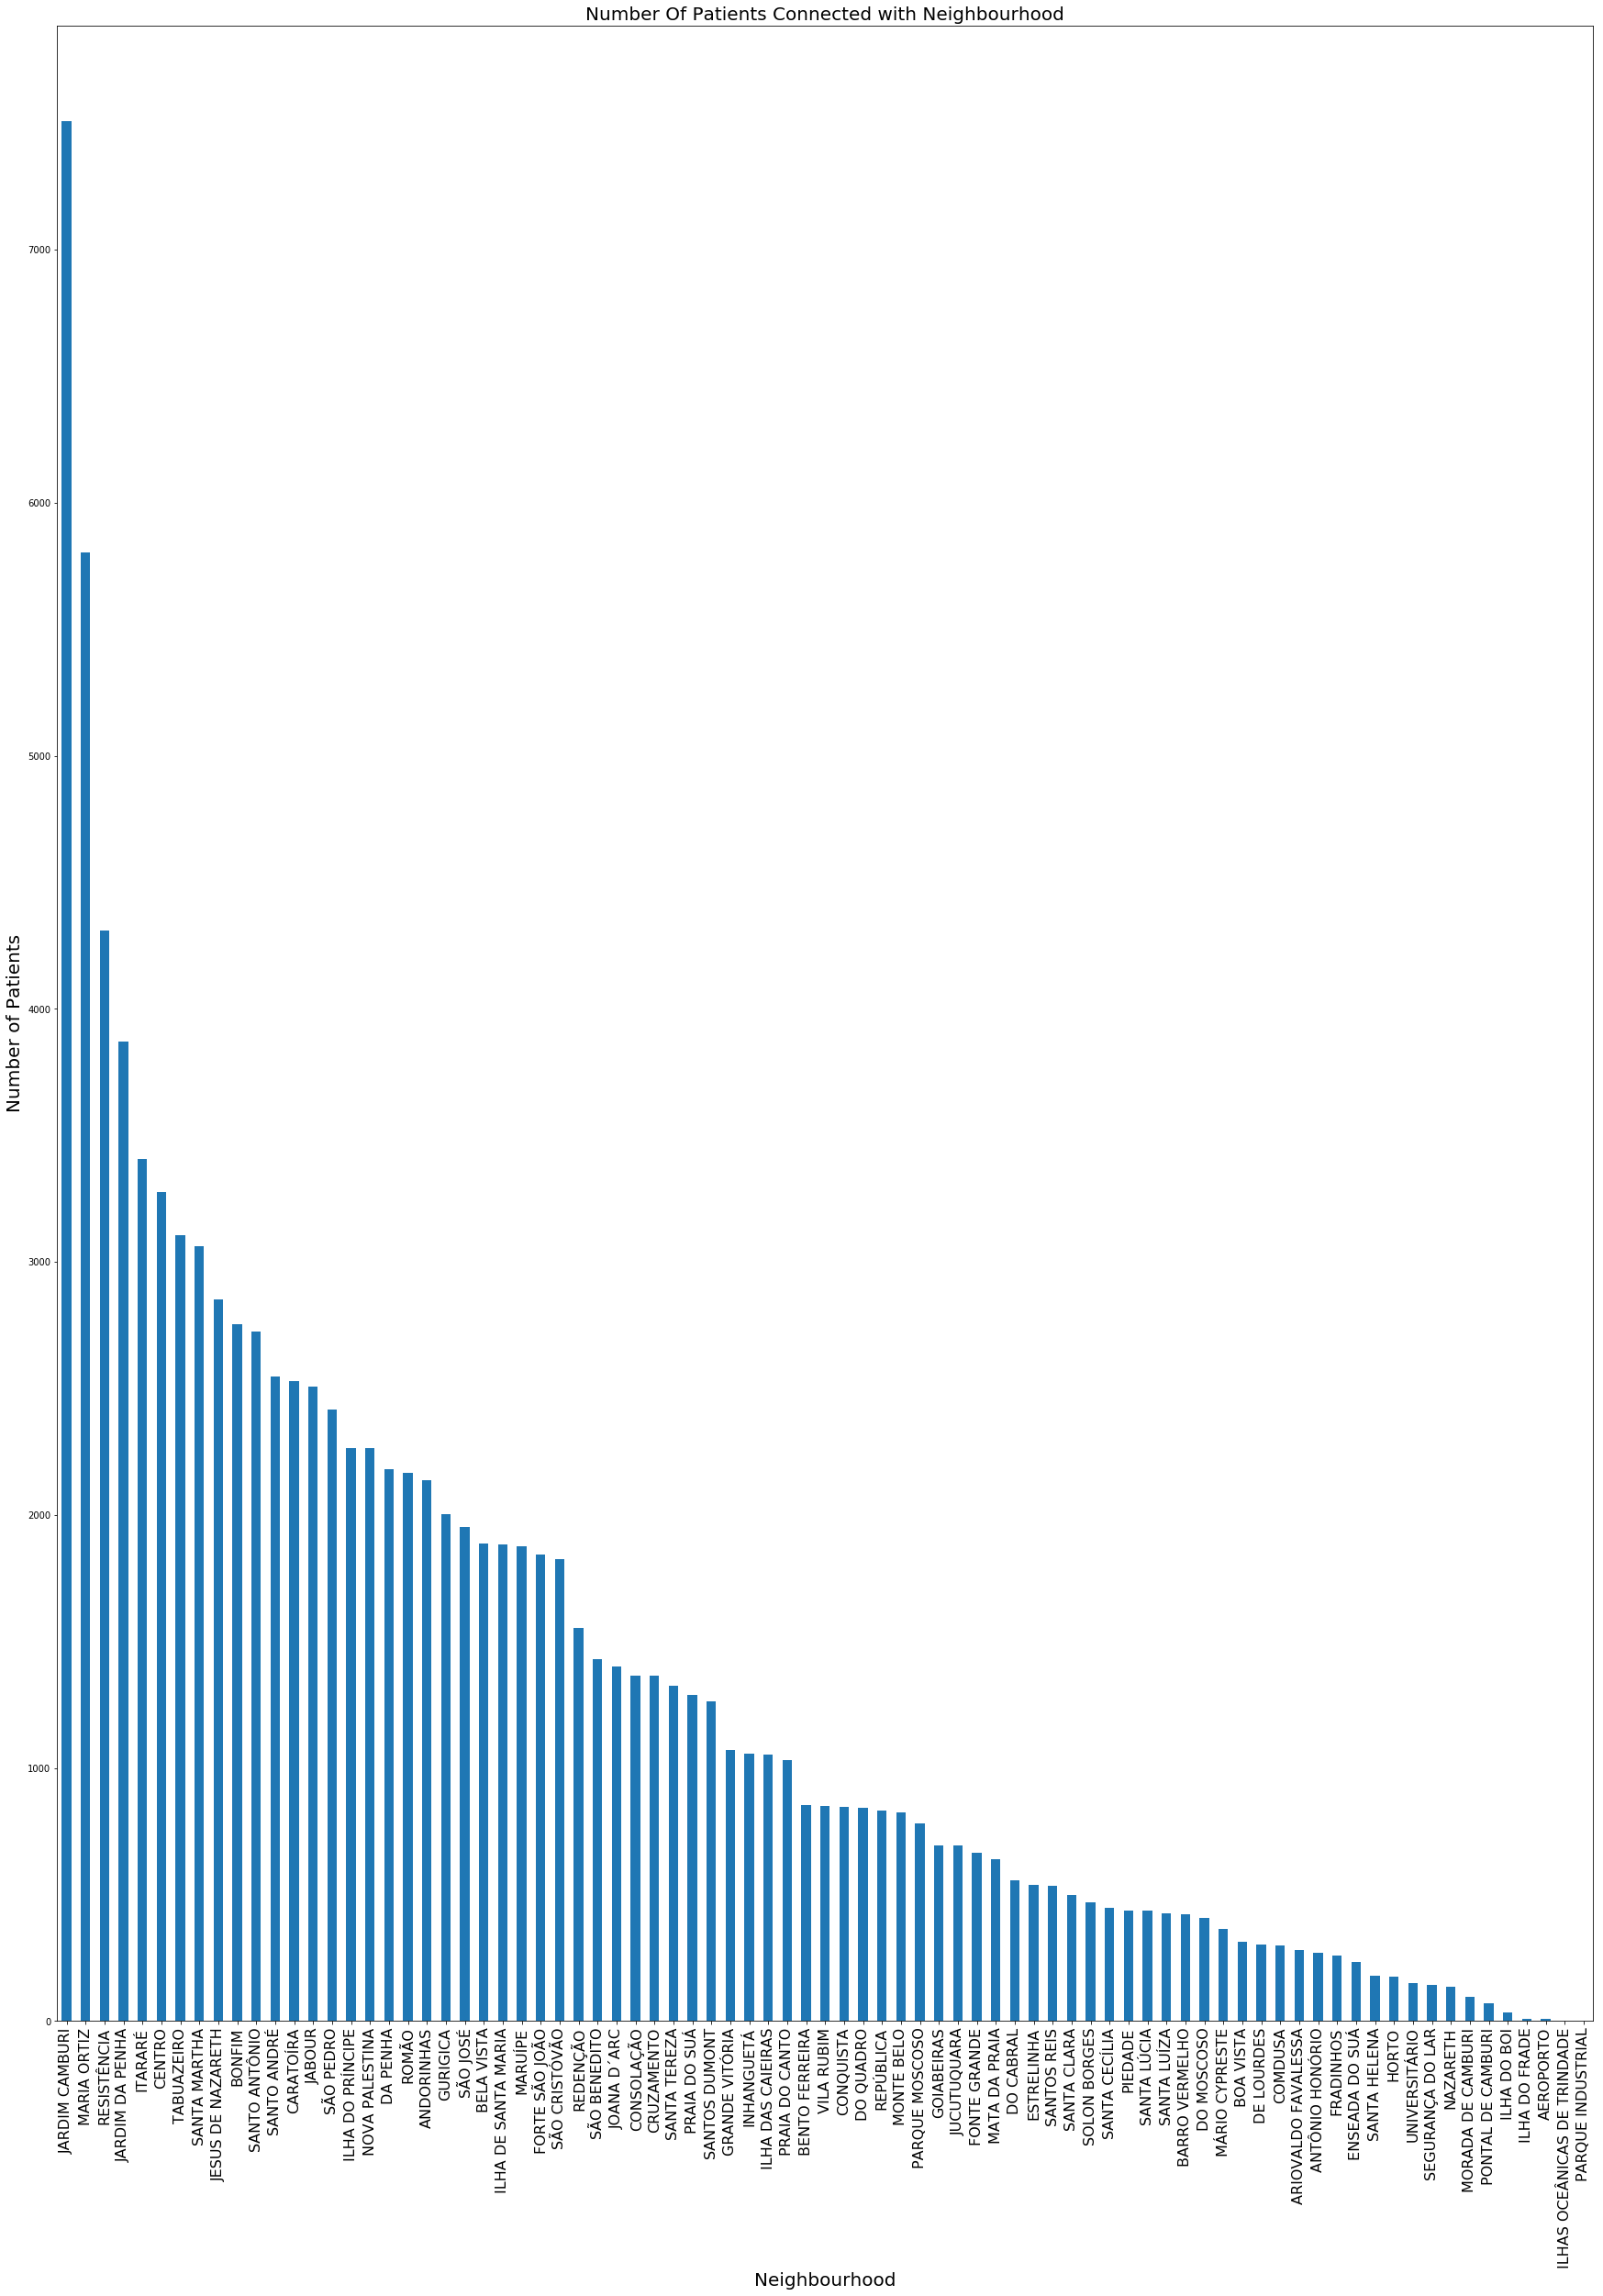

In [97]:
# Compute Neighbourhood receiving maximum and minimum patients
Neighbourhood=df_noshow.Neighbourhood.value_counts()
print("Neighbourhood having maximum patients is {}".format(Neighbourhood.idxmax()))
print("Neighbourhood having minimum patients is {}".format(Neighbourhood.idxmin()))
Neighbourhood.plot(kind='bar',figsize=(30,40));
plt.xlabel('Neighbourhood',fontsize="20")
plt.ylabel('Number of Patients',fontsize='20')
plt.title('Number Of Patients Connected with Neighbourhood',fontsize='20')
plt.xticks(fontsize="16")

**Neighbourhood receiving maximum and minimum patients is JARDIM CAMBURI and PARQUE INDUSTRIAL respectively.**

Neighbourhood having maximum Show-up is JARDIM CAMBURI
Neighbourhood having minimum Show-up is ILHAS OCEÂNICAS DE TRINDADE


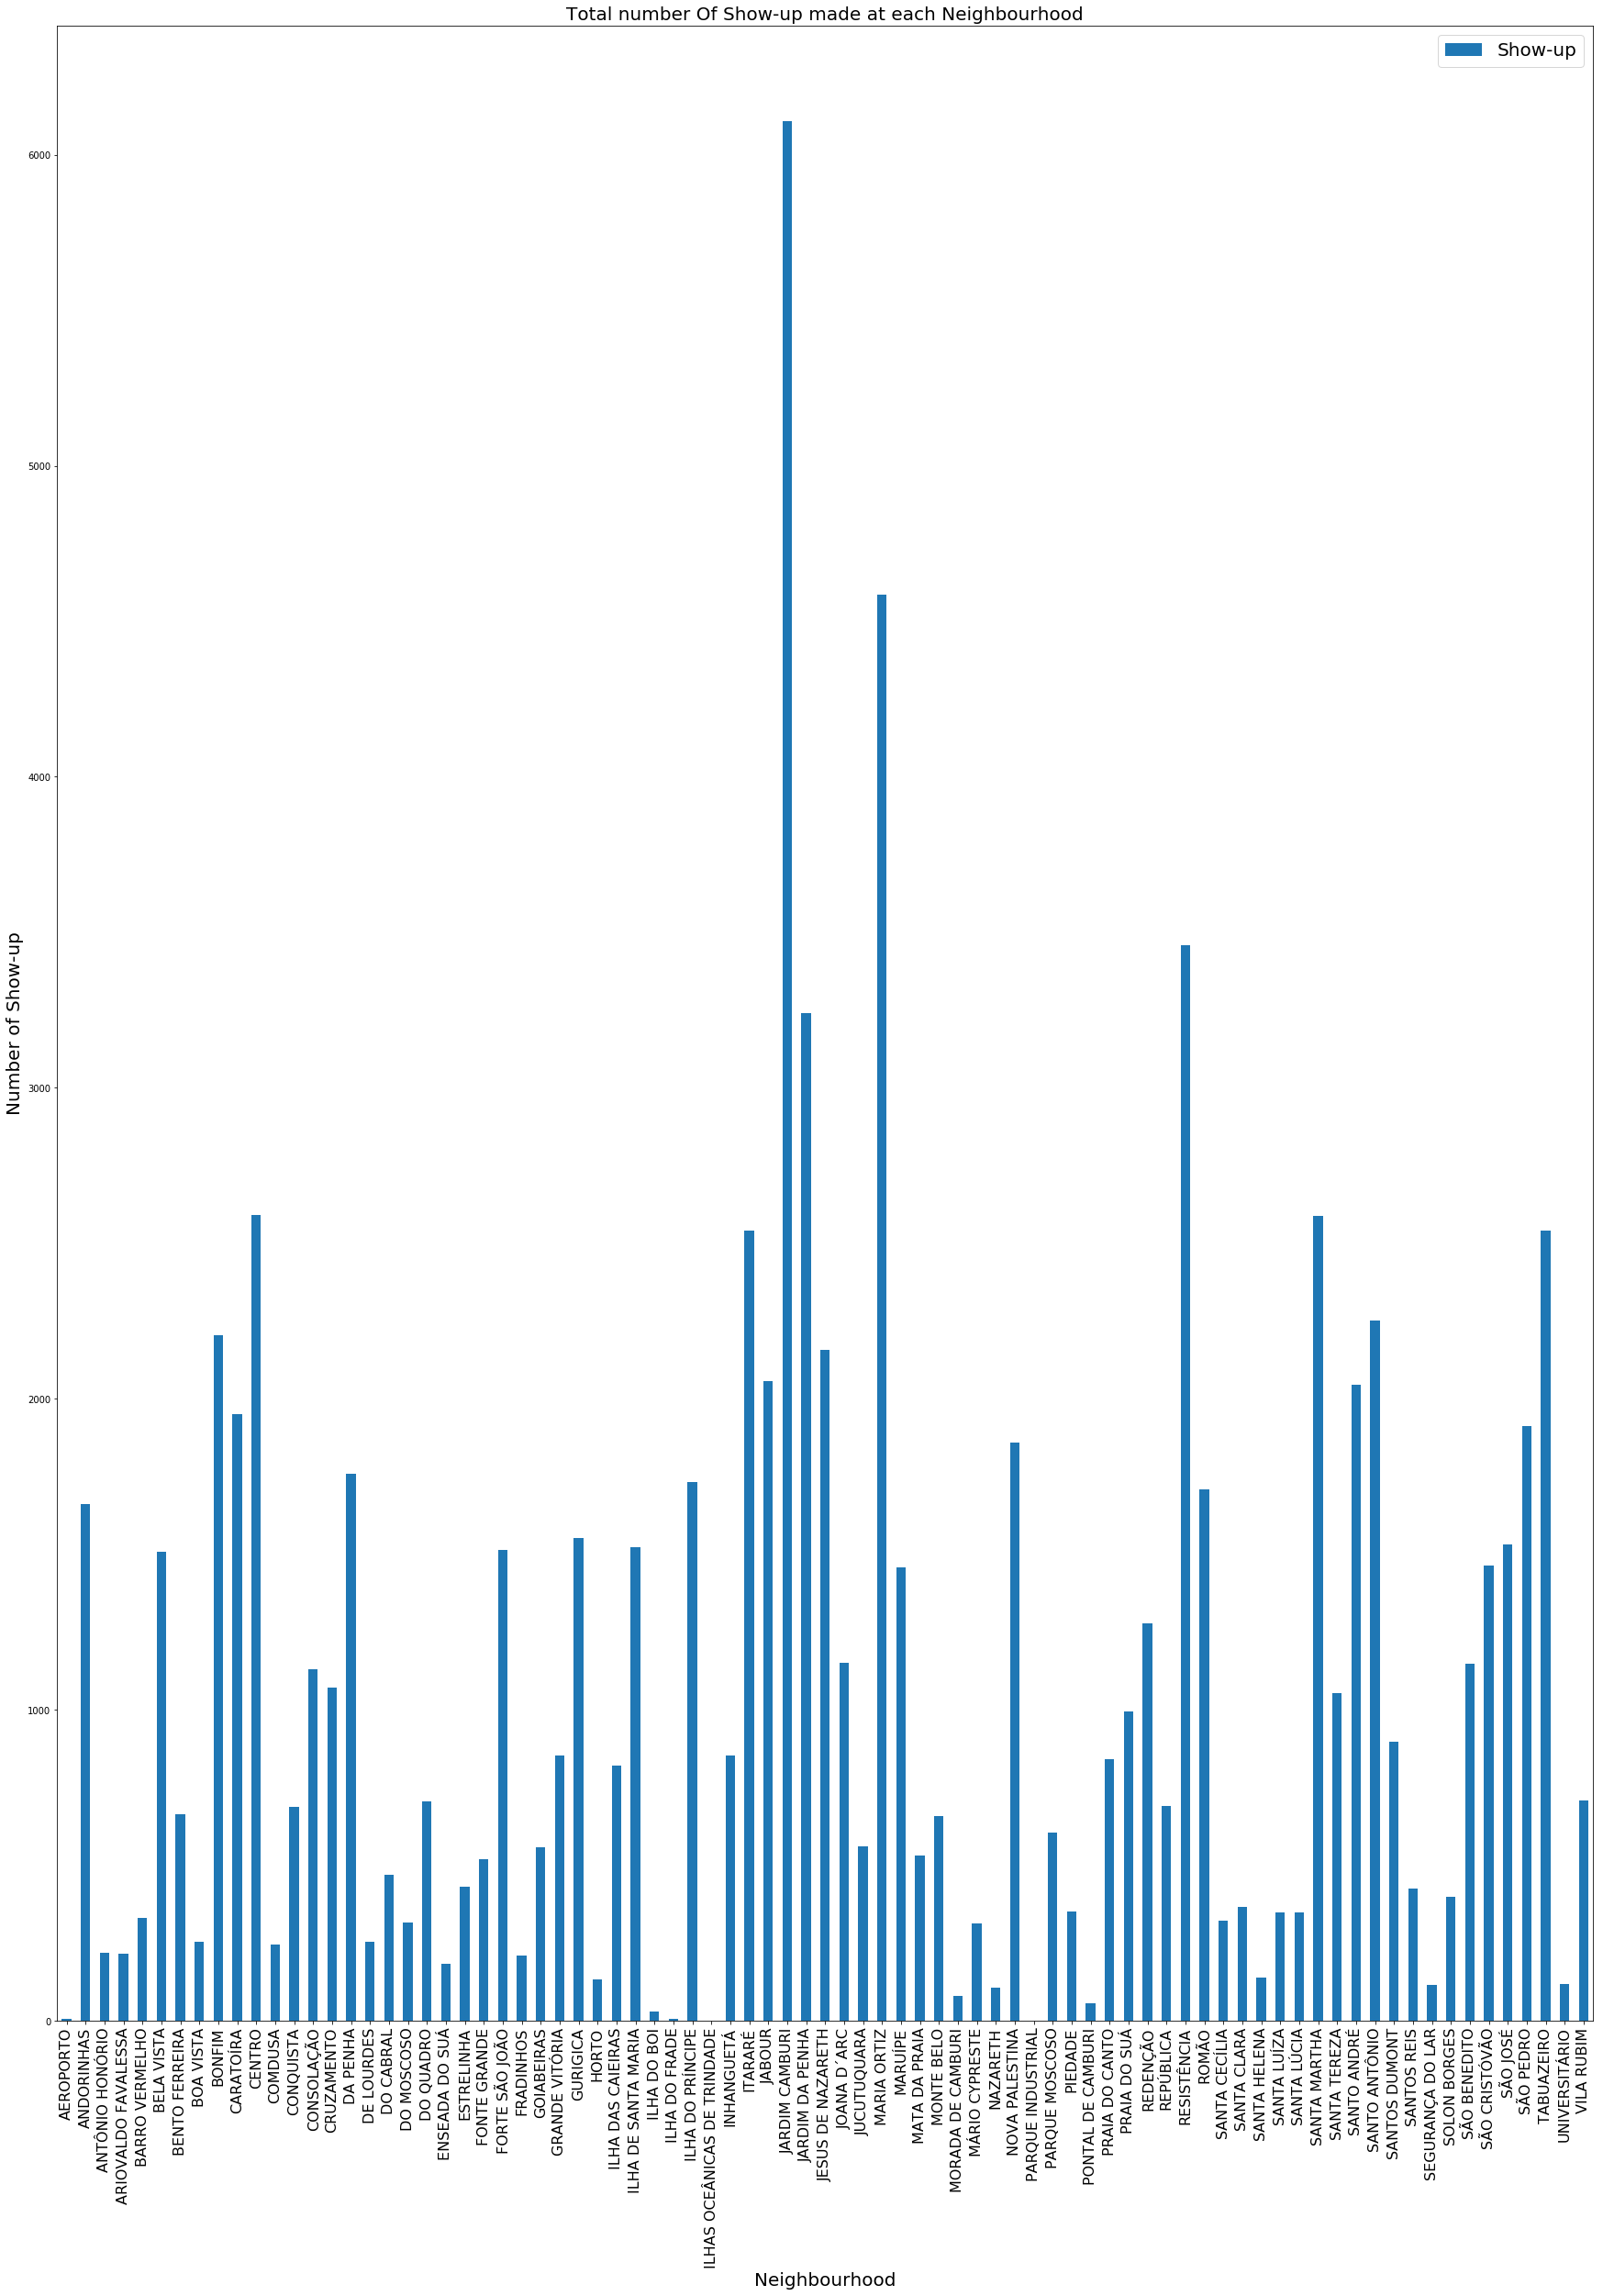

In [98]:
#Compute Neighbourhood having maximum and minimum Show-up
grouped = df_noshow.groupby("Neighbourhood")["No_Show"].apply (lambda group: group[group=='Show-up'].count())
grouped.plot(kind='bar',figsize=(30,40),label='Show-up')
plt.xlabel('Neighbourhood',fontsize="20")
plt.ylabel('Number of Show-up',fontsize='20')
plt.title('Total number Of Show-up made at each Neighbourhood',fontsize='20')
plt.xticks(fontsize="16")
plt.legend(fontsize='20',loc='upper right')
print("Neighbourhood having maximum Show-up is {}".format(grouped.idxmax()))
print("Neighbourhood having minimum Show-up is {}".format(grouped.idxmin()))

**Maximum and minimum "show-up" is made at JARDIM CAMBURI and ILHAS OCEÂNICAS DE TRINDADE neighbourhood respectively.**

Neighbourhood having maximum No-Show is JARDIM CAMBURI
Neighbourhood having minimum No-Show is PARQUE INDUSTRIAL


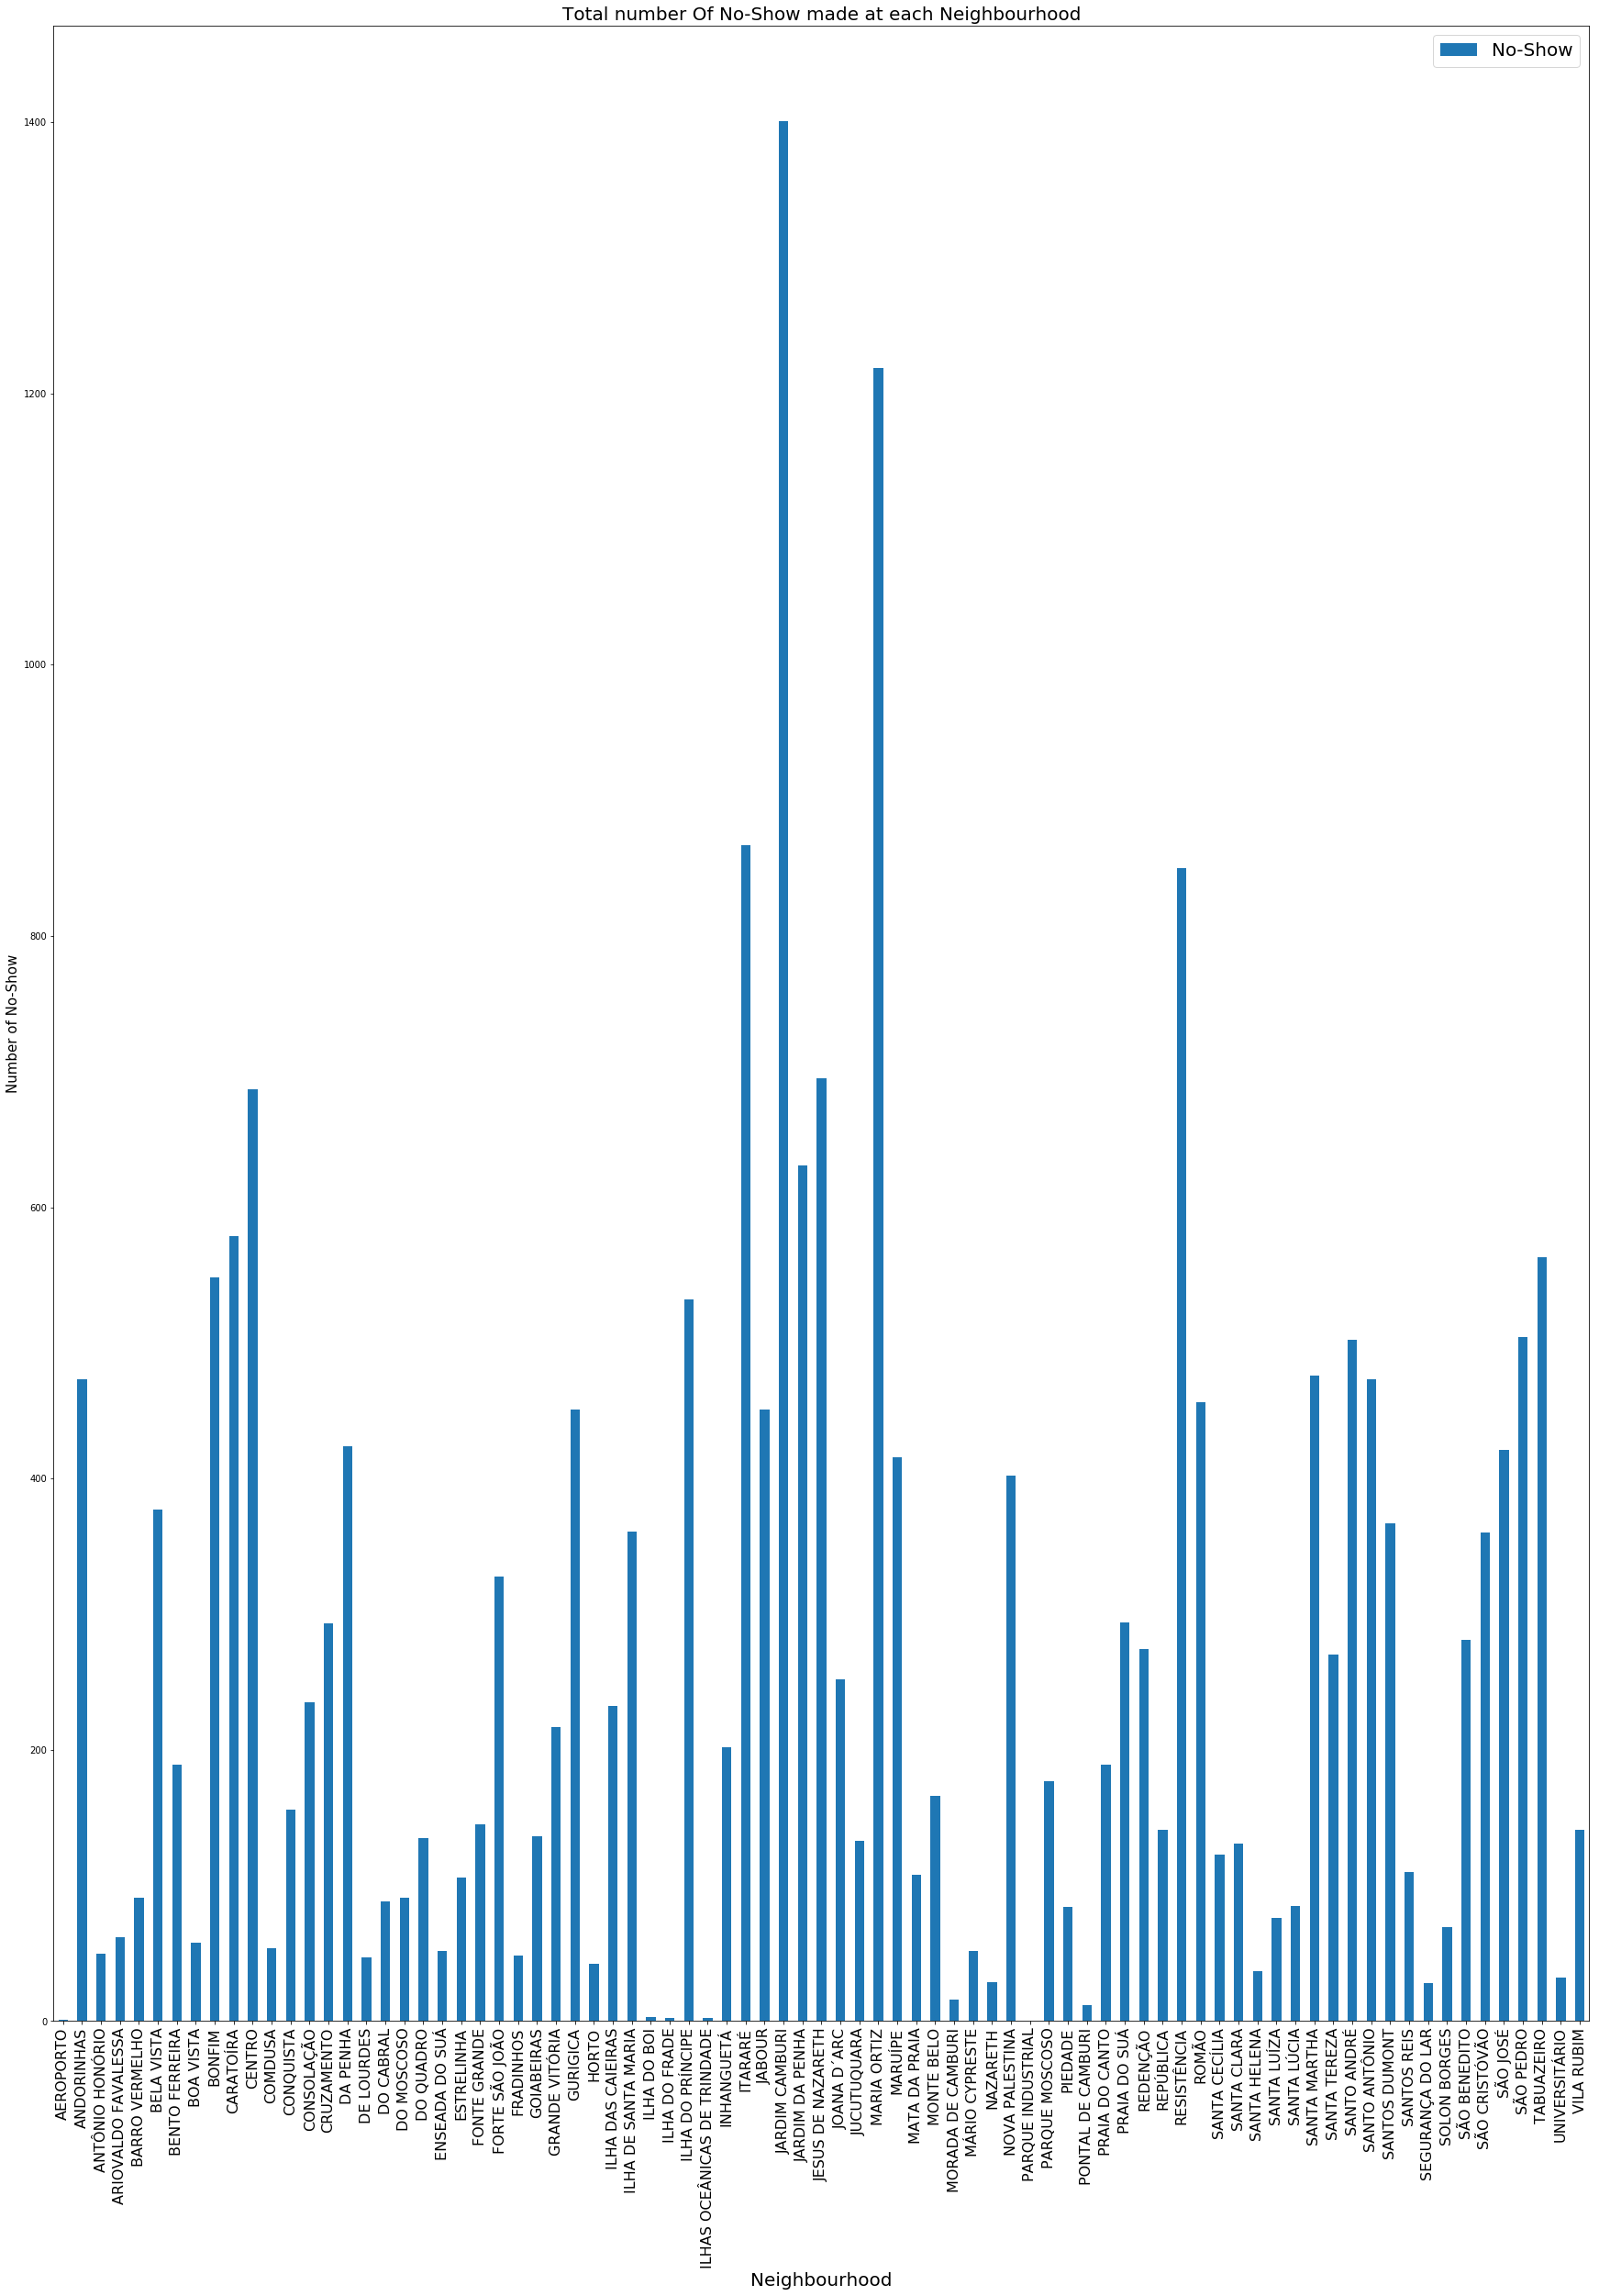

In [99]:
#Compute Neighbourhood having maximum and minimum No-Show
grouped = df_noshow.groupby("Neighbourhood")["No_Show"].apply (lambda group: group[group=='No-Show'].count())
grouped.plot(kind='bar',figsize=(30,40),label='No-Show')
plt.xlabel('Neighbourhood',fontsize="20")
plt.ylabel('Number of No-Show',fontsize='15')
plt.title('Total number Of No-Show made at each Neighbourhood',fontsize='20')
plt.xticks(fontsize='16')
plt.legend(fontsize='20',loc='upper right')
print("Neighbourhood having maximum No-Show is {}".format(grouped.idxmax()))
print("Neighbourhood having minimum No-Show is {}".format(grouped.idxmin()))

**Maximum and minimum "No-Show" is made at JARDIM CAMBURI and PARQUE INDUSTRIAL neighbourhood respectively.**

### Question 3: How is age of  patients related to Show-up/No-Show on the appointment day?

In [100]:
bins=[0,10,20,30,40,50,60,70,80,90,100]
df_noshow['AgeGroup']=pd.cut(df_noshow['Age'],bins)

No_Show      No-Show    Show-up
AgeGroup                       
(0, 10]    20.564784  79.435216
(10, 20]   25.125589  74.874411
(20, 30]   24.471922  75.528078
(30, 40]   21.186956  78.813044
(40, 50]   19.750915  80.249085
(50, 60]   17.161140  82.838860
(60, 70]   14.661858  85.338142
(70, 80]   15.364308  84.635692
(80, 90]   15.808241  84.191759
(90, 100]  18.918919  81.081081


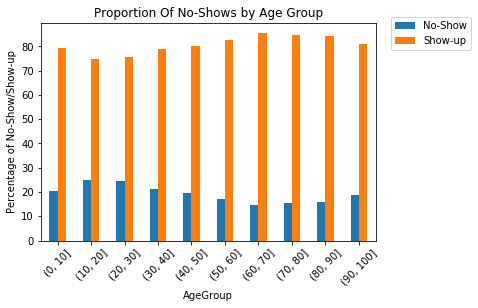

In [101]:
Age_noshow=pd.crosstab(df_noshow.AgeGroup,df_noshow.No_Show).apply(lambda r:r/r.sum()*100,axis=1)
print(Age_noshow)
Age_noshow.plot(kind='bar',rot=45);
plt.ylabel('Percentage of No-Show/Show-up')
plt.title('Proportion Of No-Shows by Age Group')
plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1.05))

###  Question 4: Analysis of No-Show status based on gender

Text(0.5,1,'No.Of Patients categorized by Gender')

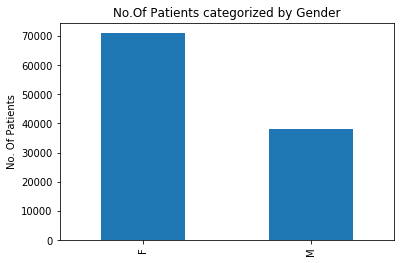

In [102]:
Gender=df_noshow.Gender.value_counts().plot(kind='bar')
plt.ylabel('No. Of Patients')
plt.title('No.Of Patients categorized by Gender')

No_Show  No-Show  Show-up
Gender                   
F          14309    56660
M           7552    30671


Text(0.5,1,'No_Show Status based on Gender')

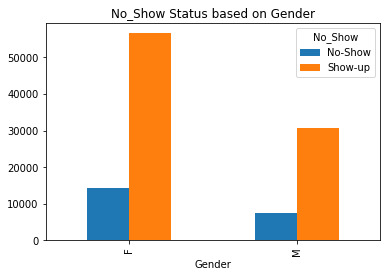

In [103]:
gender_group=pd.crosstab(df_noshow.Gender,df_noshow.No_Show)
print(gender_group)
gender_group.plot(kind='bar')
#plt.xticks(rotation='horizontal')
#plt.ylabel("No.Of Patients")
plt.title('No_Show Status based on Gender')

### Question 5: The patients who recieved SMS showed up more or less?

No_Show       No-Show  Show-up
SMS_Received                  
0               12144    61793
1                9717    25538


Text(0.5,1,'No-Show/Show-up based on SMS Received ')

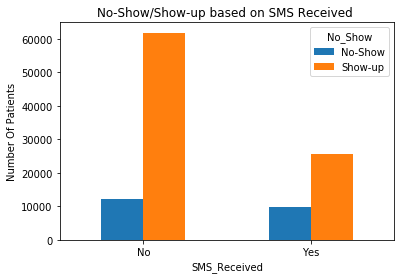

In [104]:
SMS_Group=pd.crosstab(df_noshow.SMS_Received,df_noshow.No_Show)
print(SMS_Group)
SMS_Group.plot(kind='bar')
x=[0,1]
labels=['No','Yes']
plt.xticks(x,labels,rotation='horizontal')
plt.ylabel('Number Of Patients')
plt.title('No-Show/Show-up based on SMS Received ')

### Question 6: How is No_Show status related to patient's disease(Diabetes,Hypertension,Alcoholism,Handicap)?

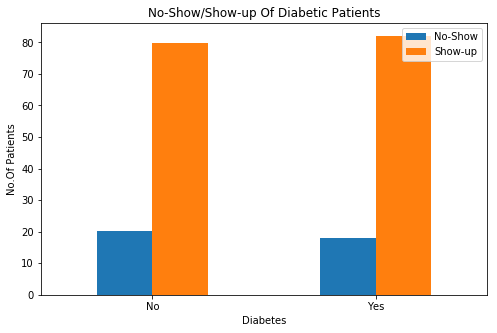

In [105]:
pd.crosstab( df_noshow.Diabetes,df_noshow.No_Show).apply(lambda r:r/r.sum()*100,axis=1).plot(kind='bar',figsize=(8,5))
x=[0,1]
labels=['No','Yes']
plt.xticks(x,labels,rotation='horizontal')
plt.ylabel('No.Of Patients')
plt.title('No-Show/Show-up Of Diabetic Patients')
plt.legend(loc='upper right') 

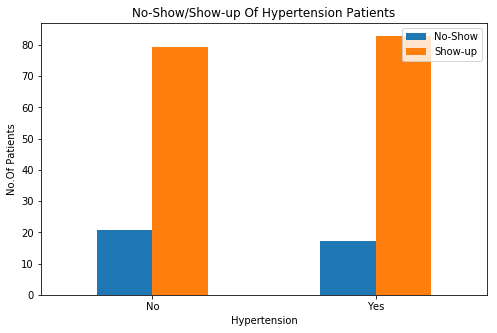

In [106]:
pd.crosstab( df_noshow.Hypertension,df_noshow.No_Show).apply(lambda r:r/r.sum()*100,axis=1).plot(kind='bar',figsize=(8,5))
x=[0,1]
labels=['No','Yes']
plt.xticks(x,labels,rotation='horizontal')
plt.ylabel('No.Of Patients')
plt.title('No-Show/Show-up Of Hypertension Patients')
plt.legend(loc='upper right')

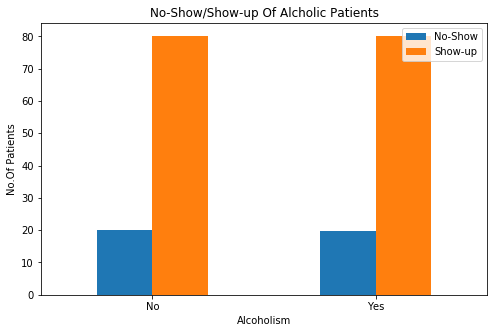

In [107]:
pd.crosstab( df_noshow.Alcoholism,df_noshow.No_Show).apply(lambda r:r/r.sum()*100,axis=1).plot(kind='bar',figsize=(8,5))
x=[0,1]
labels=['No','Yes']
plt.xticks(x,labels,rotation='horizontal')
plt.ylabel('No.Of Patients')
plt.title('No-Show/Show-up Of Alcholic Patients')
plt.legend(loc='upper right')

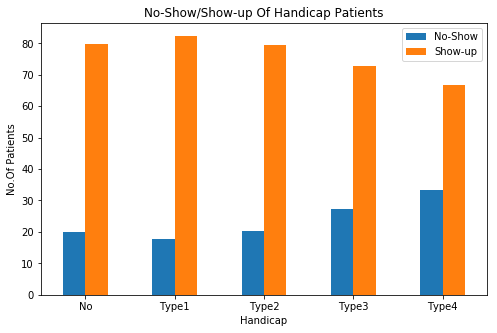

In [108]:
pd.crosstab( df_noshow.Handicap,df_noshow.No_Show).apply(lambda r:r/r.sum()*100,axis=1).plot(kind='bar',figsize=(8,5))
x=[0,1,2,3,4]
labels=['No','Type1','Type2','Type3','Type4']
plt.xticks(x,labels,rotation='horizontal')
plt.ylabel('No.Of Patients')
plt.title('No-Show/Show-up Of Handicap Patients')
plt.legend(loc='upper right')

### Question 7: Total Number Of Appointments per patient

Text(0.5,1,'Number of Appointments per patient')

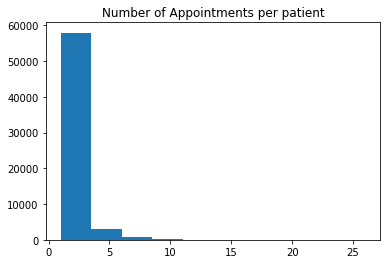

In [109]:
patient_appointment = df_noshow.groupby('PatientID')['AppointmentDay'].nunique()
plt.hist(patient_appointment);
plt.title("Number of Appointments per patient")


In [110]:
patient_appointment.mean()

1.6477819347942277

<a id='conclusions'></a>
## Conclusions

**Question 1**: Do Patients enrolled with Brazilian Welfare Program(having Scholarship) show up more or less?
            
 **Answer**   : Number of patients having scholarship is less and majority of them are females.
                Percentage of people having scholarship and don't show up is more.
                
            
**Question 2**: Which Neighbourhood receives maximum and minimum No-Show/Show-up

 **Answer**  : Neighbourhood receiving maximum and minimum patients is JARDIM CAMBURI and PARQUE INDUSTRIAL respectively.
               
            Maximum and minimum "show-up" is made at JARDIM CAMBURI and ILHAS OCEÂNICAS DE TRINDADE neighbourhood                           respectively.
               
            Maximum and minimum "No-Show" is made at JARDIM CAMBURI and PARQUE INDUSTRIAL neighbourhood respectively.
            
            
**Question 3**: How is age of  patients related to Show-up/No-Show on the appointment day?
            
 **Answer**   : In all age groups percentage of patients who show-up is more than that of patients who don't show-up.
 
           
**Question 4**: Analysis of No-Show status based on gender
            
 **Answer**   : Female patients are more than male.Number of patients who "show-up" is more in both the gender.
 
 
            
**Question 5**: The patients who recieved SMS showed up more or less?
 
  **Answer**  :      The patients who recieved the SMS did not show-up as much as those who did not receive SMS.Majority of     patients  who showed up did not recieve SMS.
  
            
**Question 6**: How is No_Show status related to patient's disease(Diabetes,Hypertension,Alcoholism,Handicap)?
            
  **Answer**  : Both type of patients i.e sick(Diabetic,alcoholic,Hypertension,Handicapped) and not sick show a similar pattern                       of "No_Show" status.Patients who show-up is more irrespective of whether they are sick or not-sick.
    

In [111]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0